In [1]:
import healpy as hp
import numpy as np
from tilepy.include.MapManagement import MapReader, SkyMap, create_map_reader
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os
from pathlib import Path
import datetime

/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
# The url to the FITS file with the sky localization in a healpix format (fits file with name starting by glg_healpix
skymap = './glg_healpix_all_bn240612503_v00.fit' #https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2024/bn240612503/current/glg_healpix_all_bn240612503_v00.fit

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = datetime.datetime.fromisoformat("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAOS.ini'

# Tiles already observed
pointingsFile = None
#pointingsFile = './output/bn240612503/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'


## Test on the locprob file

In [3]:
obspar_locprob = ObservationParameters()
#obspar_locprob.mode = "locprob"
obspar_locprob.add_parsed_args(None,obsTime,datasetDir,None,outDir,pointingsFile)
obspar_locprob.from_configfile(cfgFile)

obspar_locprob.skymap = "./glg_locprob_all_bn240612503_v00.fit"
obspar_locprob.event_name = "early_gbm"
reader = create_map_reader(obspar_locprob)


In [4]:
obspar_locprob.mode

'locprob'

In [5]:
skymap = SkyMap(obspar_locprob, reader)
skymap.getArea(0.9)

<Quantity 434.12463799 deg2>

In [6]:
isinstance(reader, MapReader)

True

Starting the 2D pointing calculation with the following parameters

Filename:  early_gbm
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/early_gbm

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-S
Event Name: early_gbm
Observatory: -24.5 deg
Observatory: -70.17 deg
Observatory: 2635.0 m
Max zenith: 60
Using Greytime is: True
FOV: 4.0
Max runs: 20
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.8814 Number of runs that fulfill darkness condition  : 32 Number of effective pointings:  10

================================= Tiling found =============================================
     Time[UTC]      RA[deg]  DEC[deg]  PGW   Round ObsName

/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


./output/early_gbm/PGinFoV
Loading pointings from ./output/early_gbm/PGinFoV/SuggestedPointings_2DProbOptimisation.txt
----------   PLOTTING THE SCHEDULING   ----------
Total covered probability with the scheduled tiles is PGW= 0.88140
No galaxies given


/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


No galaxies given for plot 2


/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/edna/software/miniconda3/envs/tilepyenv-new/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in do_format 

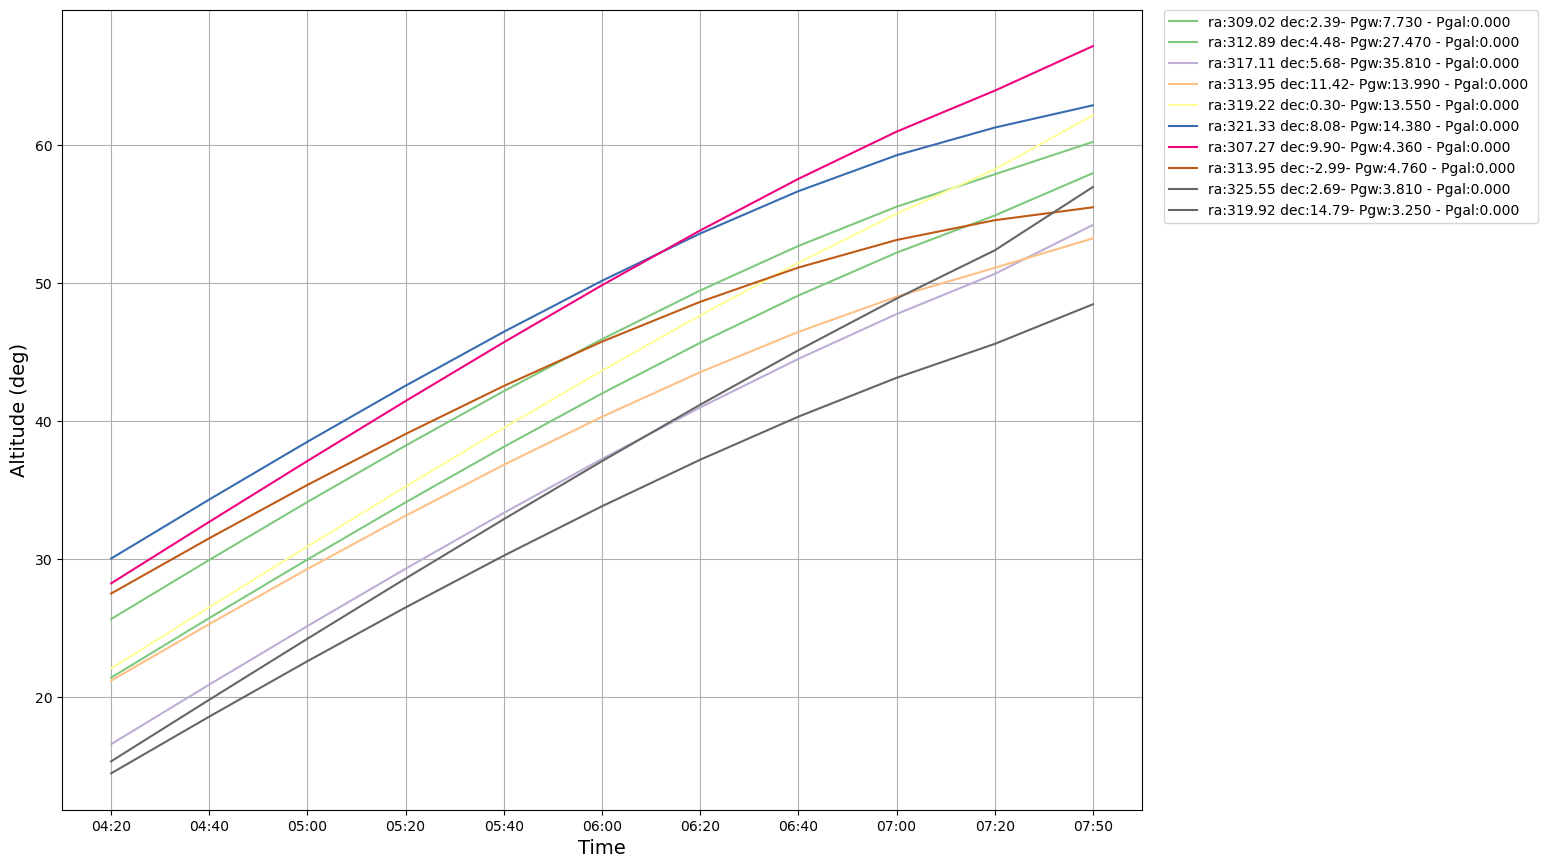

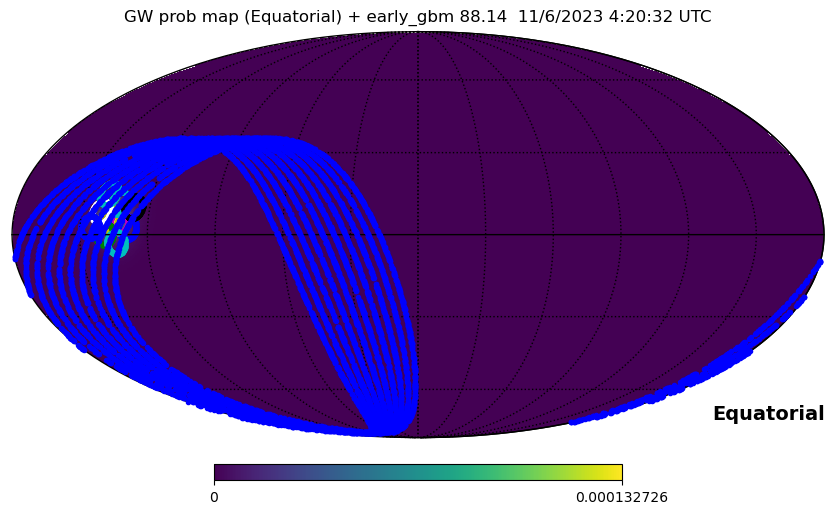

In [7]:
GetSchedule(obspar_locprob)

## Test for the gaussian case

In [19]:


obspar_gauss = ObservationParameters()
obspar_gauss.add_parsed_args(None,obsTime,datasetDir,None,outDir,pointingsFile)
obspar_gauss.from_configfile(cfgFile)
obspar_gauss.mode = "gaussian"
obspar_gauss.raSource = 312.89
obspar_gauss.decSource = 4.5
obspar_gauss.sigmaSource = 3.
obspar_gauss.nside = 512

reader_gauss = create_map_reader(obspar_gauss)
skymap_gauss = SkyMap(obspar_gauss, reader_gauss)


In [ ]:
GetSchedule(obspar_gauss)


Starting the 2D pointing calculation with the following parameters

Filename:  None
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/None

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-S
Event Name: None
Observatory: -24.5 deg
Observatory: -70.17 deg
Observatory: 2635.0 m
Max zenith: 60
Using Greytime is: True
FOV: 4.0
Max runs: 20
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

----------   NEW FOLLOW-UP ATTEMPT   ----------


In [ ]:
skymap_gauss.getArea(0.9)


In [ ]:
isinstance(reader_gauss, MapReader)

In [ ]:
obspar_gauss.mode

# Test on the healpix map

In [13]:
#Parse the parameters 
obspar_healpix = ObservationParameters()
skymap = './glg_healpix_all_bn240612503_v00.fit'
obsTime = datetime.datetime.fromisoformat("2023-06-10 14:51:47")
datasetDir = '../../tilepy/dataset/'
outDir = './output'
cfgFile = '../config/FollowupParameters_CTAOS.ini'
pointingsFile = None


obspar_healpix.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile)
obspar_healpix.from_configfile(cfgFile)

In [14]:
obspar_healpix.mode

In [15]:
reader_healpix = create_map_reader(obspar_healpix)


In [16]:
skymap_healpix = SkyMap(obspar_healpix, reader_healpix)
skymap_healpix.getArea(0.9)


<Quantity 187.5821297 deg2>

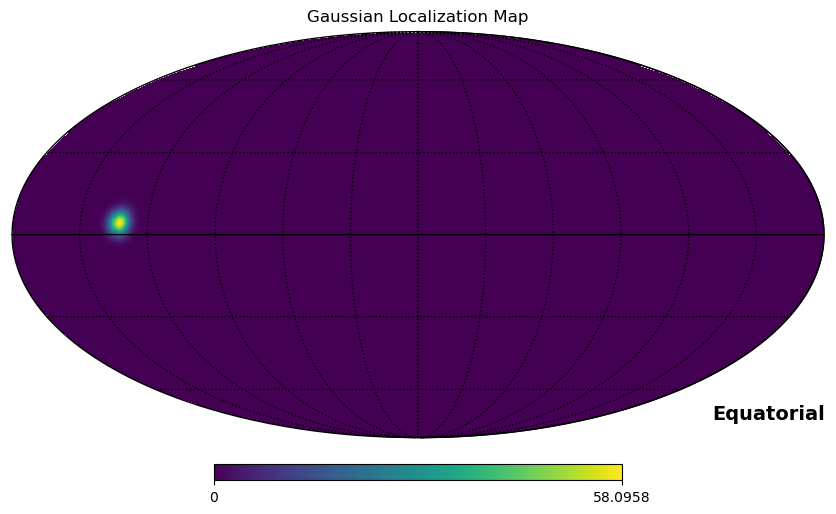

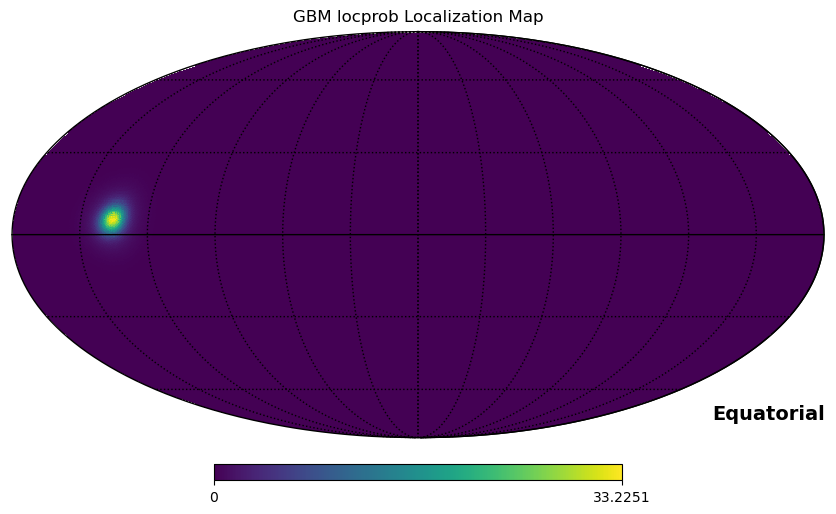

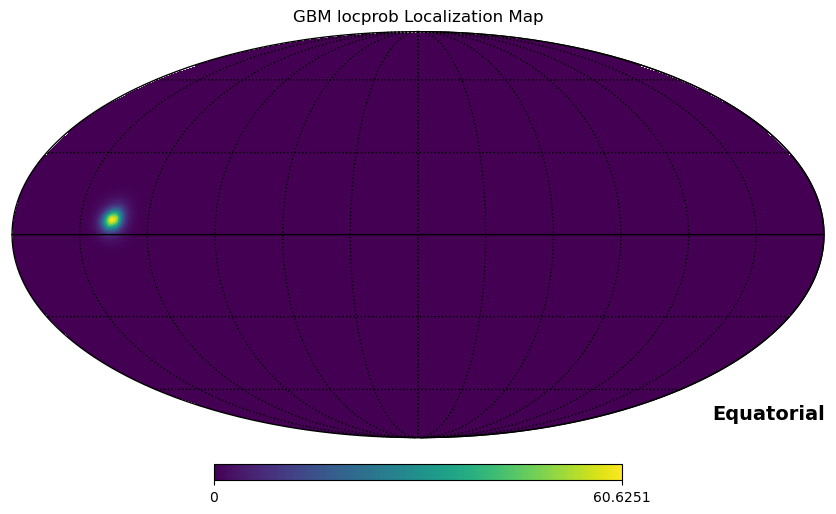

In [17]:
import matplotlib.pyplot as plt

# Plot Gaussian Localization Map
hp.mollview(reader_gauss.getMap("prob").data, title="Gaussian Localization Map", rot=[180, 0],
            coord="C", nest = True)
hp.graticule()

# Plot GBM Localization Map
hp.mollview(reader.getMap("prob").data, title="GBM locprob Localization Map",rot=[180, 0],
            coord="C",nest = True)
hp.graticule()

# Plot GBM Localization Map
hp.mollview(reader_healpix.getMap("prob").data, title="GBM locprob Localization Map",rot=[180, 0],
            coord="C",nest = True)
hp.graticule()

plt.show()

In [18]:
import matplotlib.pyplot as plt

# Plot Gaussian Localization Map
hp.mollview(gaussian_map.data, title="Gaussian Localization Map", rot=[180, 0],
            coord="C", nest = True)
hp.graticule()

# Plot GBM Localization Map
hp.mollview(gbm_map.data, title="GBM Localization Map",rot=[180, 0],
            coord="C",nest = True)
hp.graticule()

plt.show()

NameError: name 'gaussian_map' is not defined